# SVM Exercises

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

#### Load Pima Diabetes dataset

In [3]:
url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names=names)
data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Split the data into training, validation, and test sets with a test size of 25% per split.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data.loc[:, 'class'], test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33333)

In [18]:
print(X_train)
print(X_val)
print(X_test)

     preg  plas  pres  skin  test  mass   pedi  age
688     1   140    74    26   180  24.1  0.828   23
47      2    71    70    27     0  28.0  0.586   22
142     2   108    52    26    63  32.5  0.318   22
466     0    74    52    10    36  27.8  0.269   22
530     2   122    60    18   106  29.8  0.717   22
..    ...   ...   ...   ...   ...   ...    ...  ...
235     4   171    72     0     0  43.6  0.479   26
436    12   140    85    33     0  37.4  0.244   41
265     5    96    74    18    67  33.6  0.997   43
490     2    83    65    28    66  36.8  0.629   24
624     2   108    64     0     0  30.8  0.158   21

[384 rows x 8 columns]
     preg  plas  pres  skin  test  mass   pedi  age
569     0   121    66    30   165  34.3  0.203   33
520     2    68    70    32    66  25.0  0.187   25
578    10   133    68     0     0  27.0  0.245   36
534     1    77    56    30    56  33.3  1.251   24
305     2   120    76    37   105  39.7  0.215   29
..    ...   ...   ...   ...   ...   ... 

Create a model with sklearn's `SVC` and set a high gamma value (perhaps 1.0).

In [28]:
model = SVC(gamma = 1.0)
model.fit(X_train, y_train)

SVC(gamma=1.0)

Print the training and validation accuracies.

In [29]:
print(f"{model.score(X_train, y_train):.2f}%")
print(f"{model.score(X_val, y_val):.2f}%")

1.00%
0.66%


Create an `SVC` with a low gamma value (perhaps .001).

In [30]:
modelLG = SVC(gamma = 0.001)
modelLG.fit(X_train, y_train)

SVC(gamma=0.001)

Print the training and validation accuracies.

In [31]:
print(f"{model.score(X_train, y_train):.2f}%")
print(f"{model.score(X_val, y_val):.2f}%")

1.00%
0.66%


Explain the accuracy results below. 

> Answer: A higher gamma value increases training accuracy and decreases validation accuracy because the model overfits to the training data. 

Print the confusion matrices for your high and low gamma models (both numerically and graphically).

In [40]:
cm = metrics.confusion_matrix(y_val, model.predict(X_val))
print(cm)
cmLG = metrics.confusion_matrix(y_val, modelLG.predict(X_val))
print(cmLG)
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))


[[127   0]
 [ 65   0]]
[[116  11]
 [ 39  26]]
[['TN' 'FP']
 ['FN' 'TP']]


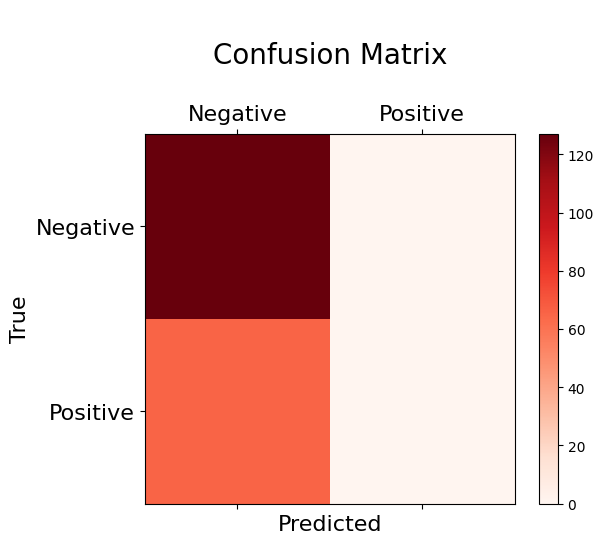

In [45]:
def plot_cmatrix(cm,labels,title='Confusion Matrix'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap='Reds')
    plt.title('\n'+title+'\n', fontsize=20)
    fig.colorbar(cax)
    ax.set_xticks(ticks=range(0, len(labels)), labels=labels, fontsize=16)
    ax.set_yticks(ticks=range(0, len(labels)), labels=labels, fontsize=16)
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('True', fontsize=16)
    plt.show()

plot_cmatrix(cm, ['Negative', 'Positive'])

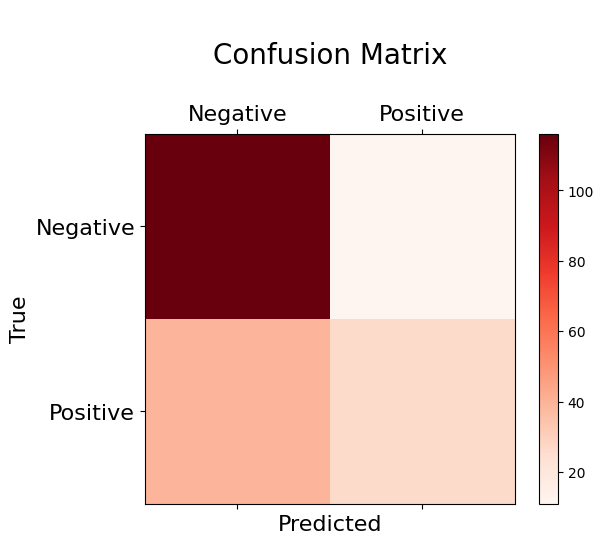

In [47]:
plot_cmatrix(cmLG, ['Negative', 'Positive'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cca5f50-39f8-471d-8735-226387513f26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>